In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [6]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### Identifying type of problems

In [7]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

#### As per problem statement Target available i.e. W is int64. Continous value so we Regression to learn our model

# Exploratary Data Analysis

In [8]:
df.shape

(30, 17)

##### There are 30 rows and 17 cloumns in dataset

In [9]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

##### ERA is a float type data and all columns are int type data.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


###### So,There is a 1 float 64 value and 16 int value and there is no null values

In [11]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

##### These are unique values in each column

In [12]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

###### There is no missing values

## Importing required libraries

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

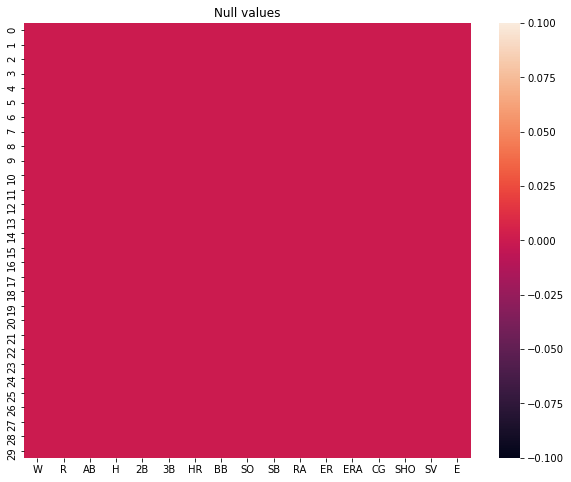

In [14]:
# checking for null values in heat map
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

#### There is no null values in given dataset

In [15]:
df['W'].value_counts()

68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64

##### There is no missing values or null values in dataset

## Data Description

In [16]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


##### All columns have the count value of 30 there is negitive values and Few columns have low values and few have high values

## Data Visualization 

In [17]:
import warnings
warnings.filterwarnings('ignore')

### Univariate Analysis:

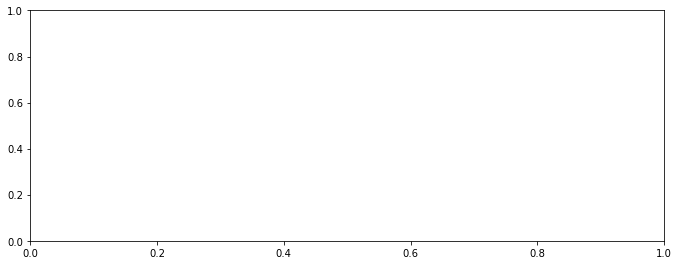

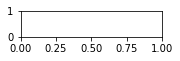

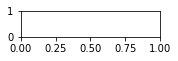

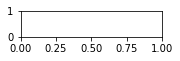

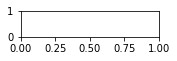

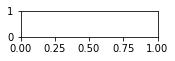

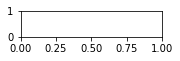

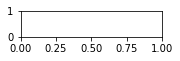

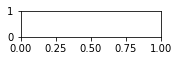

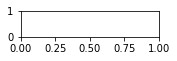

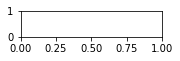

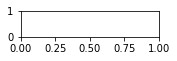

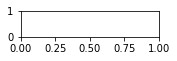

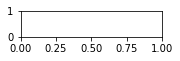

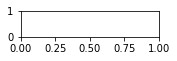

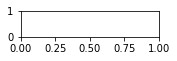

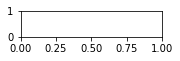

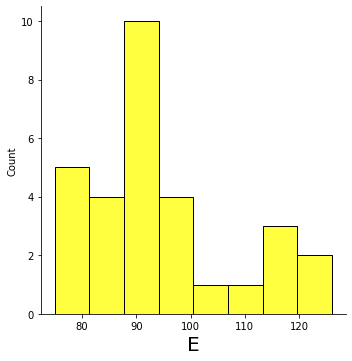

In [18]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.displot(df[column], color = 'yellow')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()    

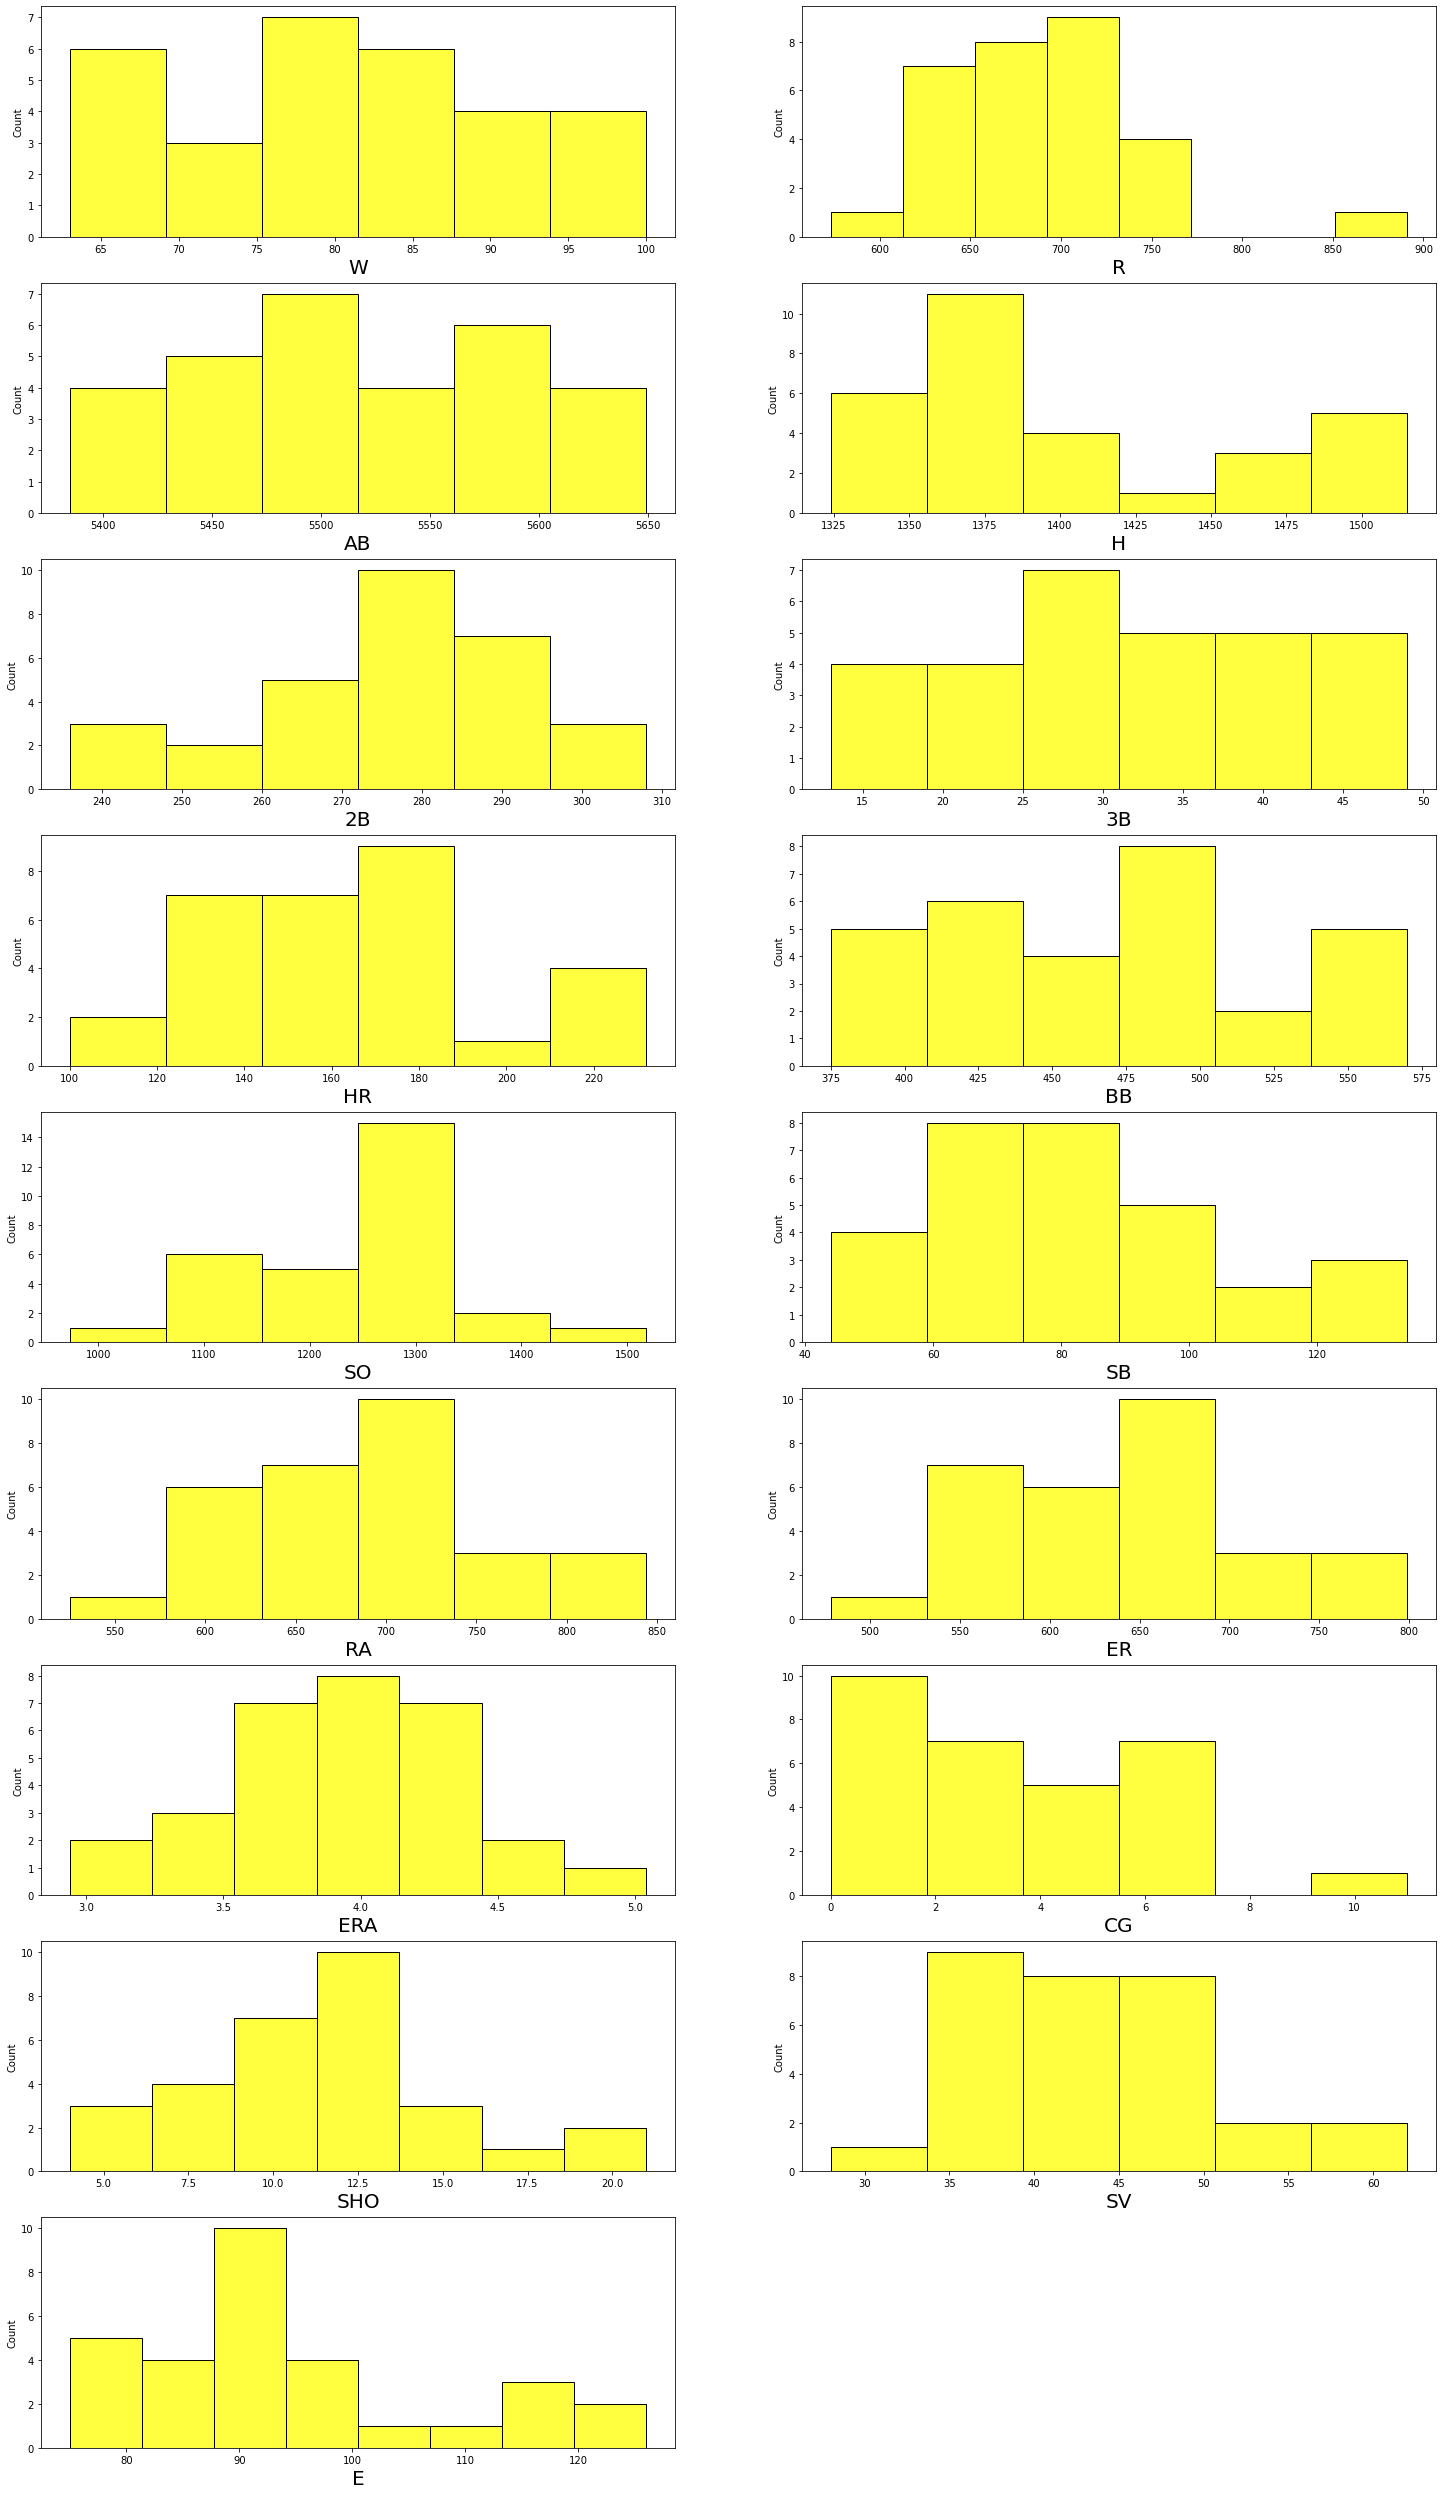

In [19]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color = 'yellow')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()    

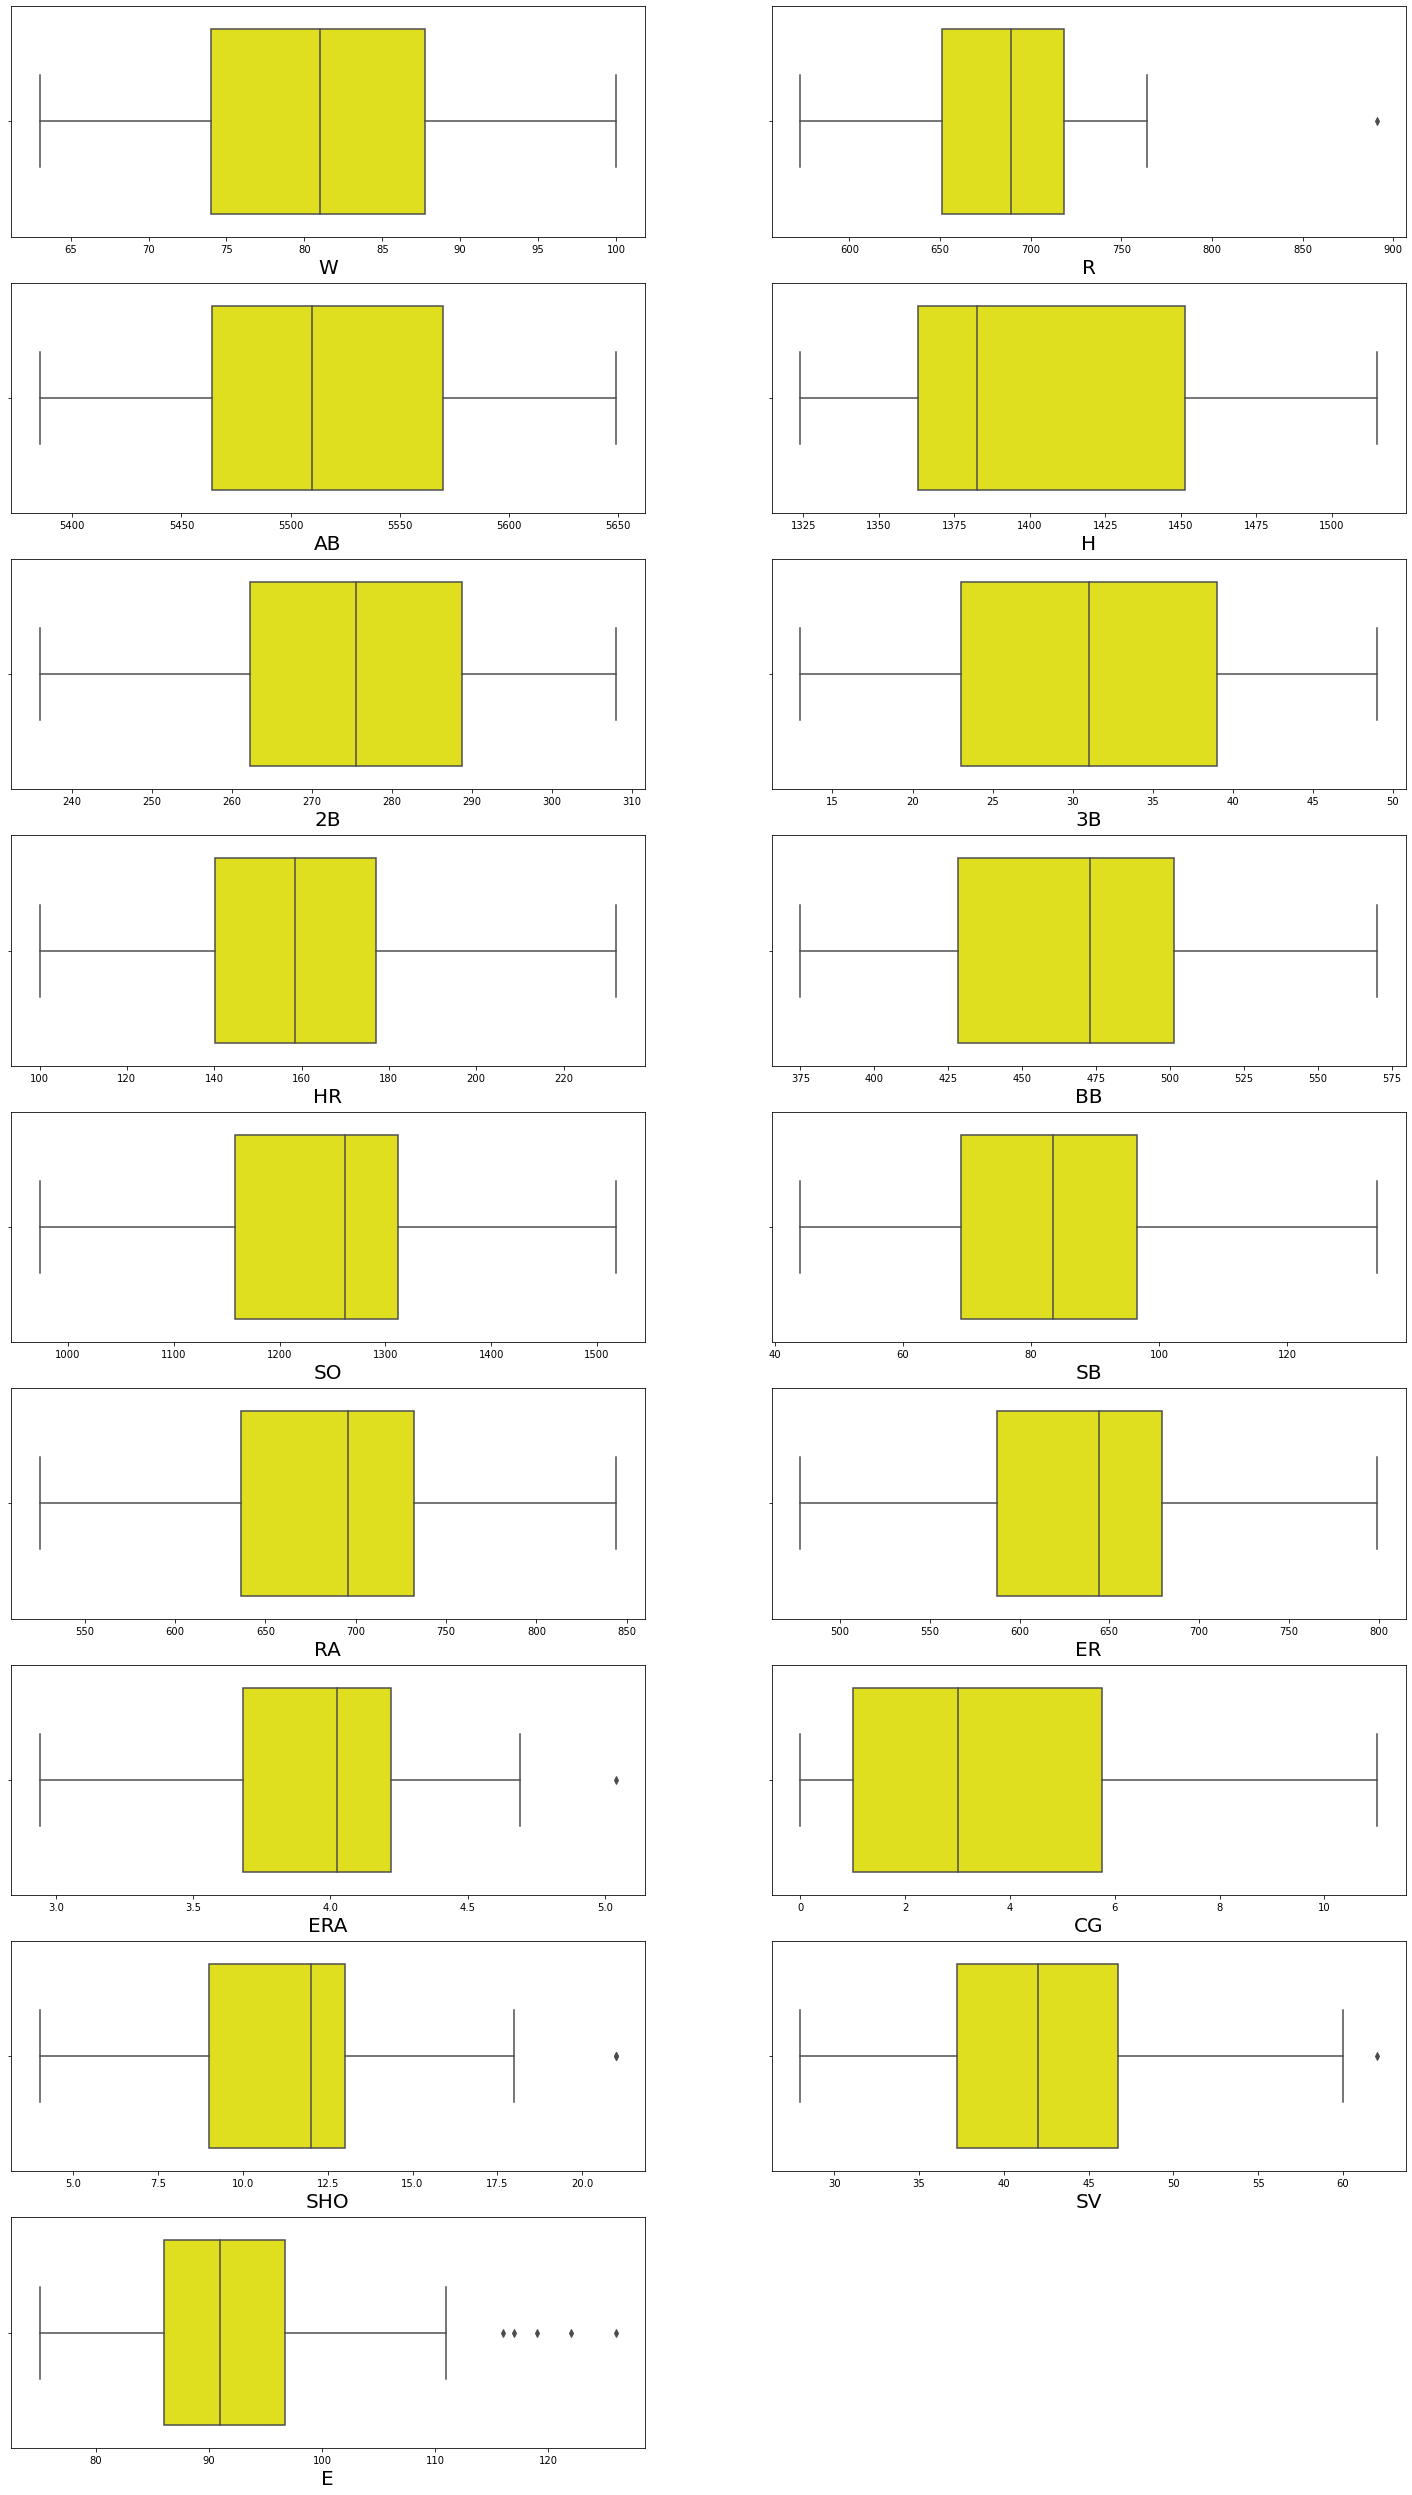

In [20]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column], color = 'yellow')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()    

##### As shown in boxplot R,ERA,SHO,E AND SV input varible is having outliters in it. So we need to remove input varibles.

### Biavariate analysis:

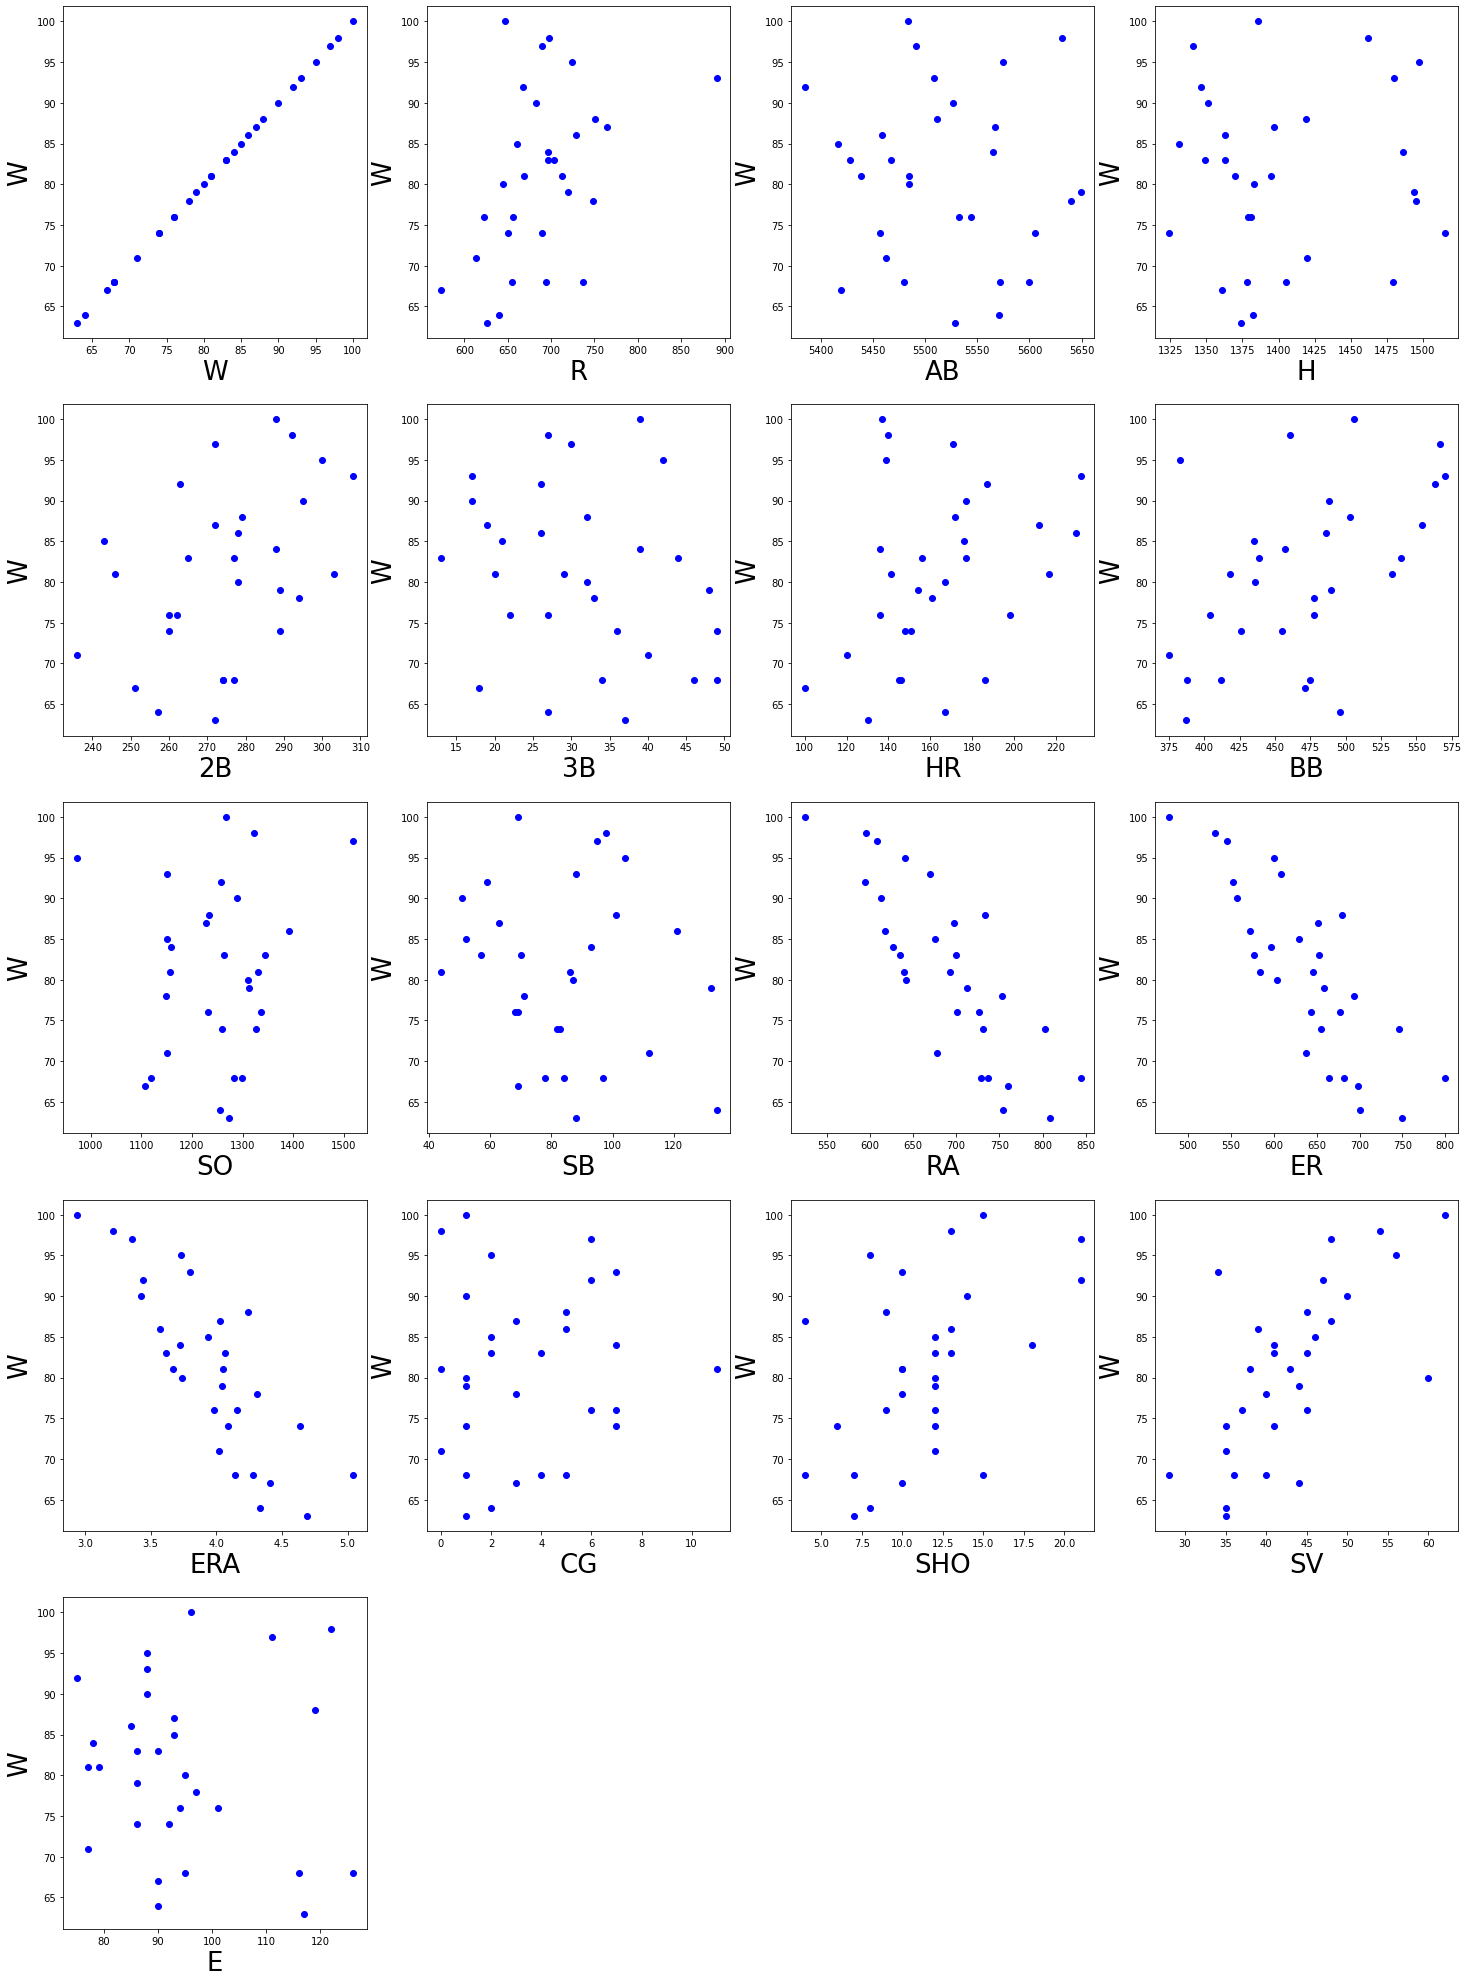

In [21]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['W'], color = 'b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('W',fontsize=26)
        
    plotnumber +=1
plt.show()    

#### In this SV,SHO,ERA AND R Having almost linear relationship with target variable and other varibles having non linear relationship. 

<Figure size 1800x3600 with 0 Axes>

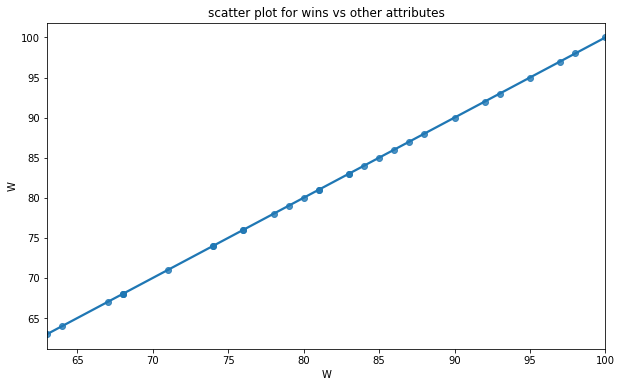

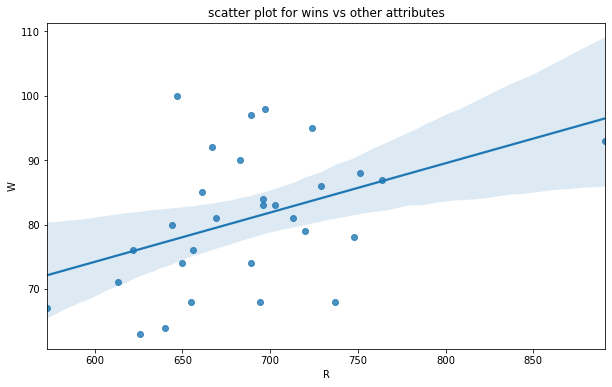

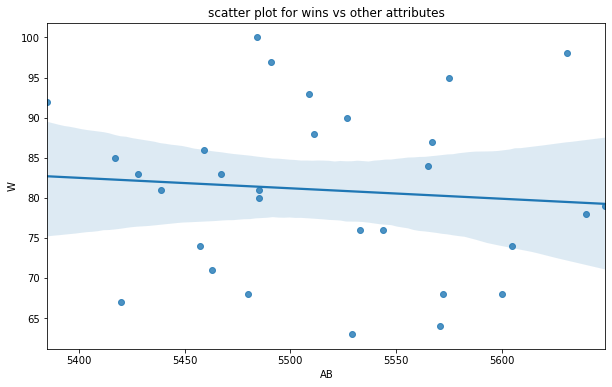

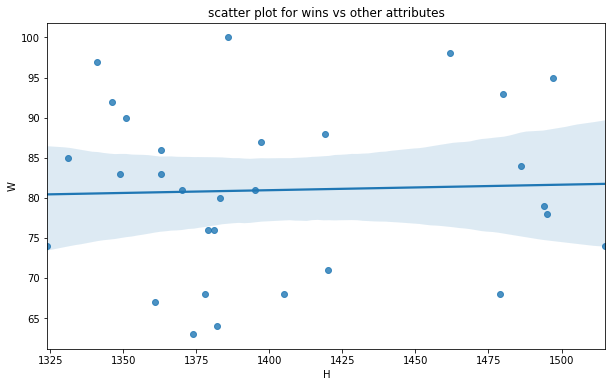

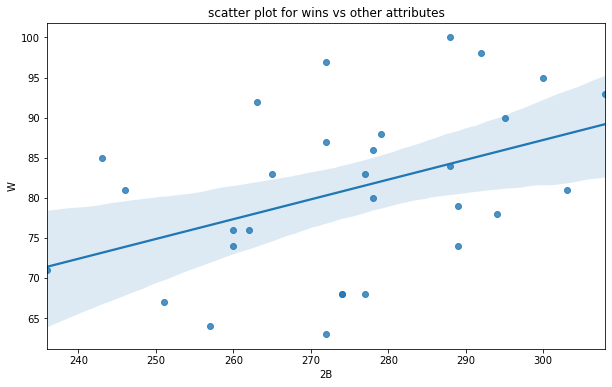

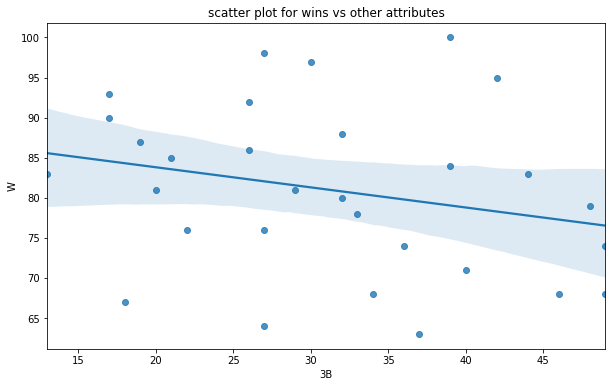

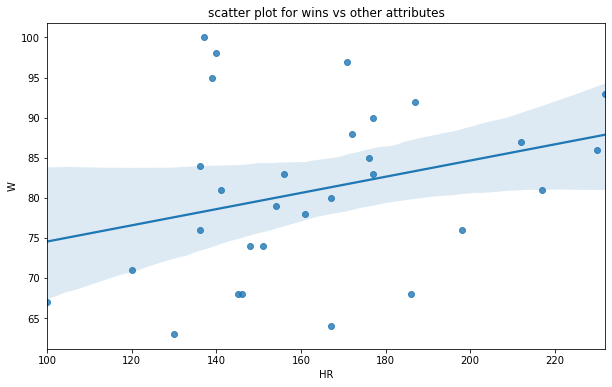

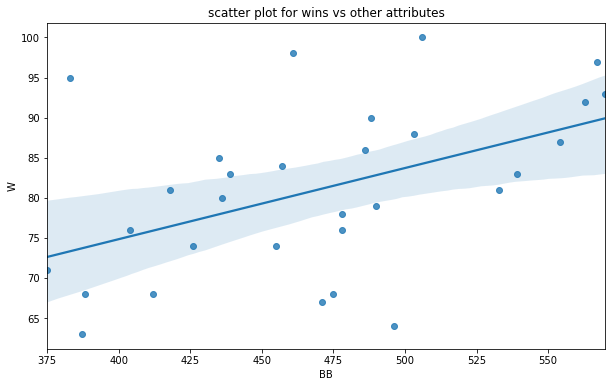

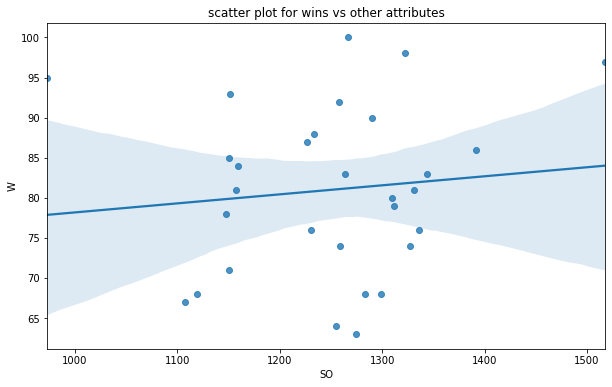

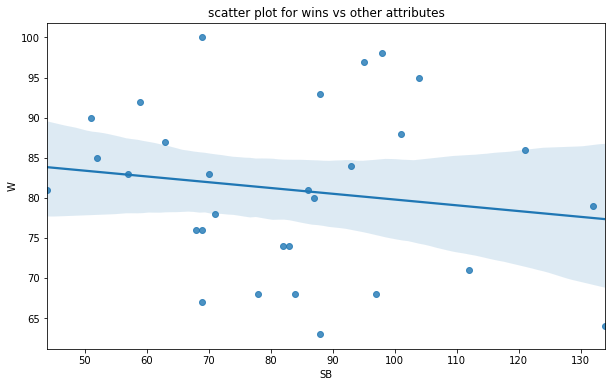

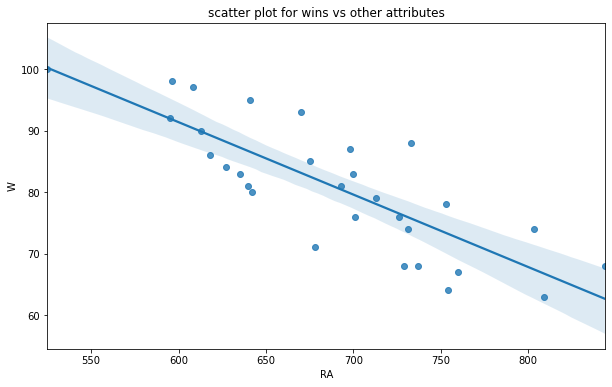

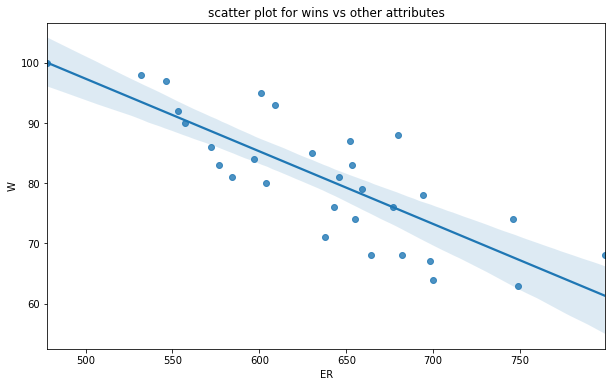

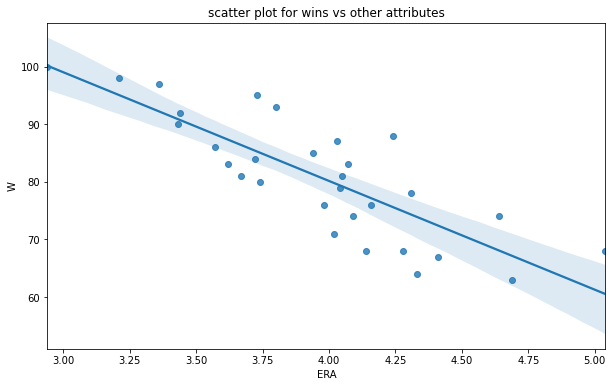

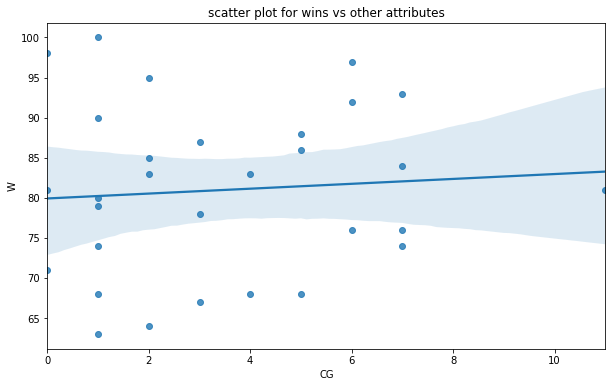

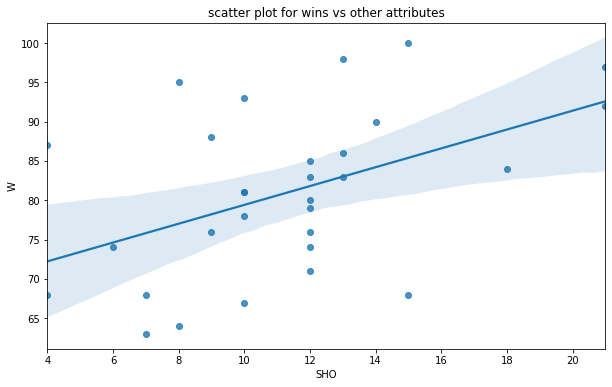

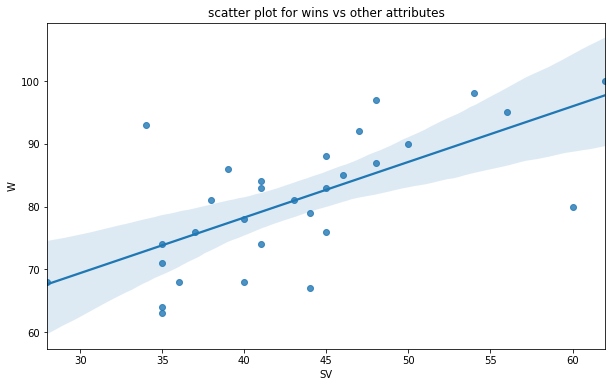

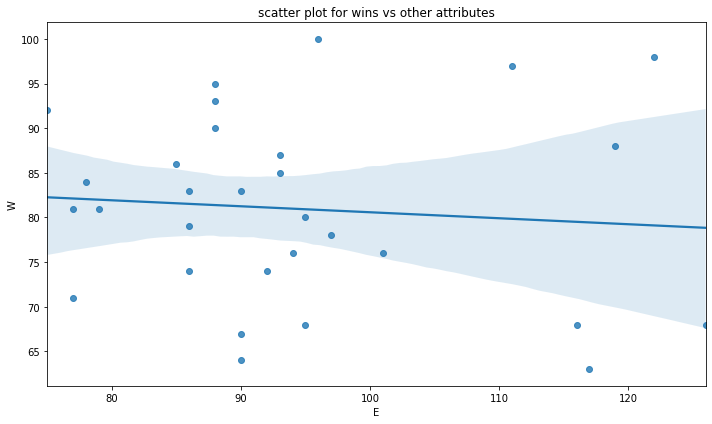

In [22]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['W'])
        plt.title('scatter plot for wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('W')
        
plt.tight_layout()        


### Multivariate Analysis:

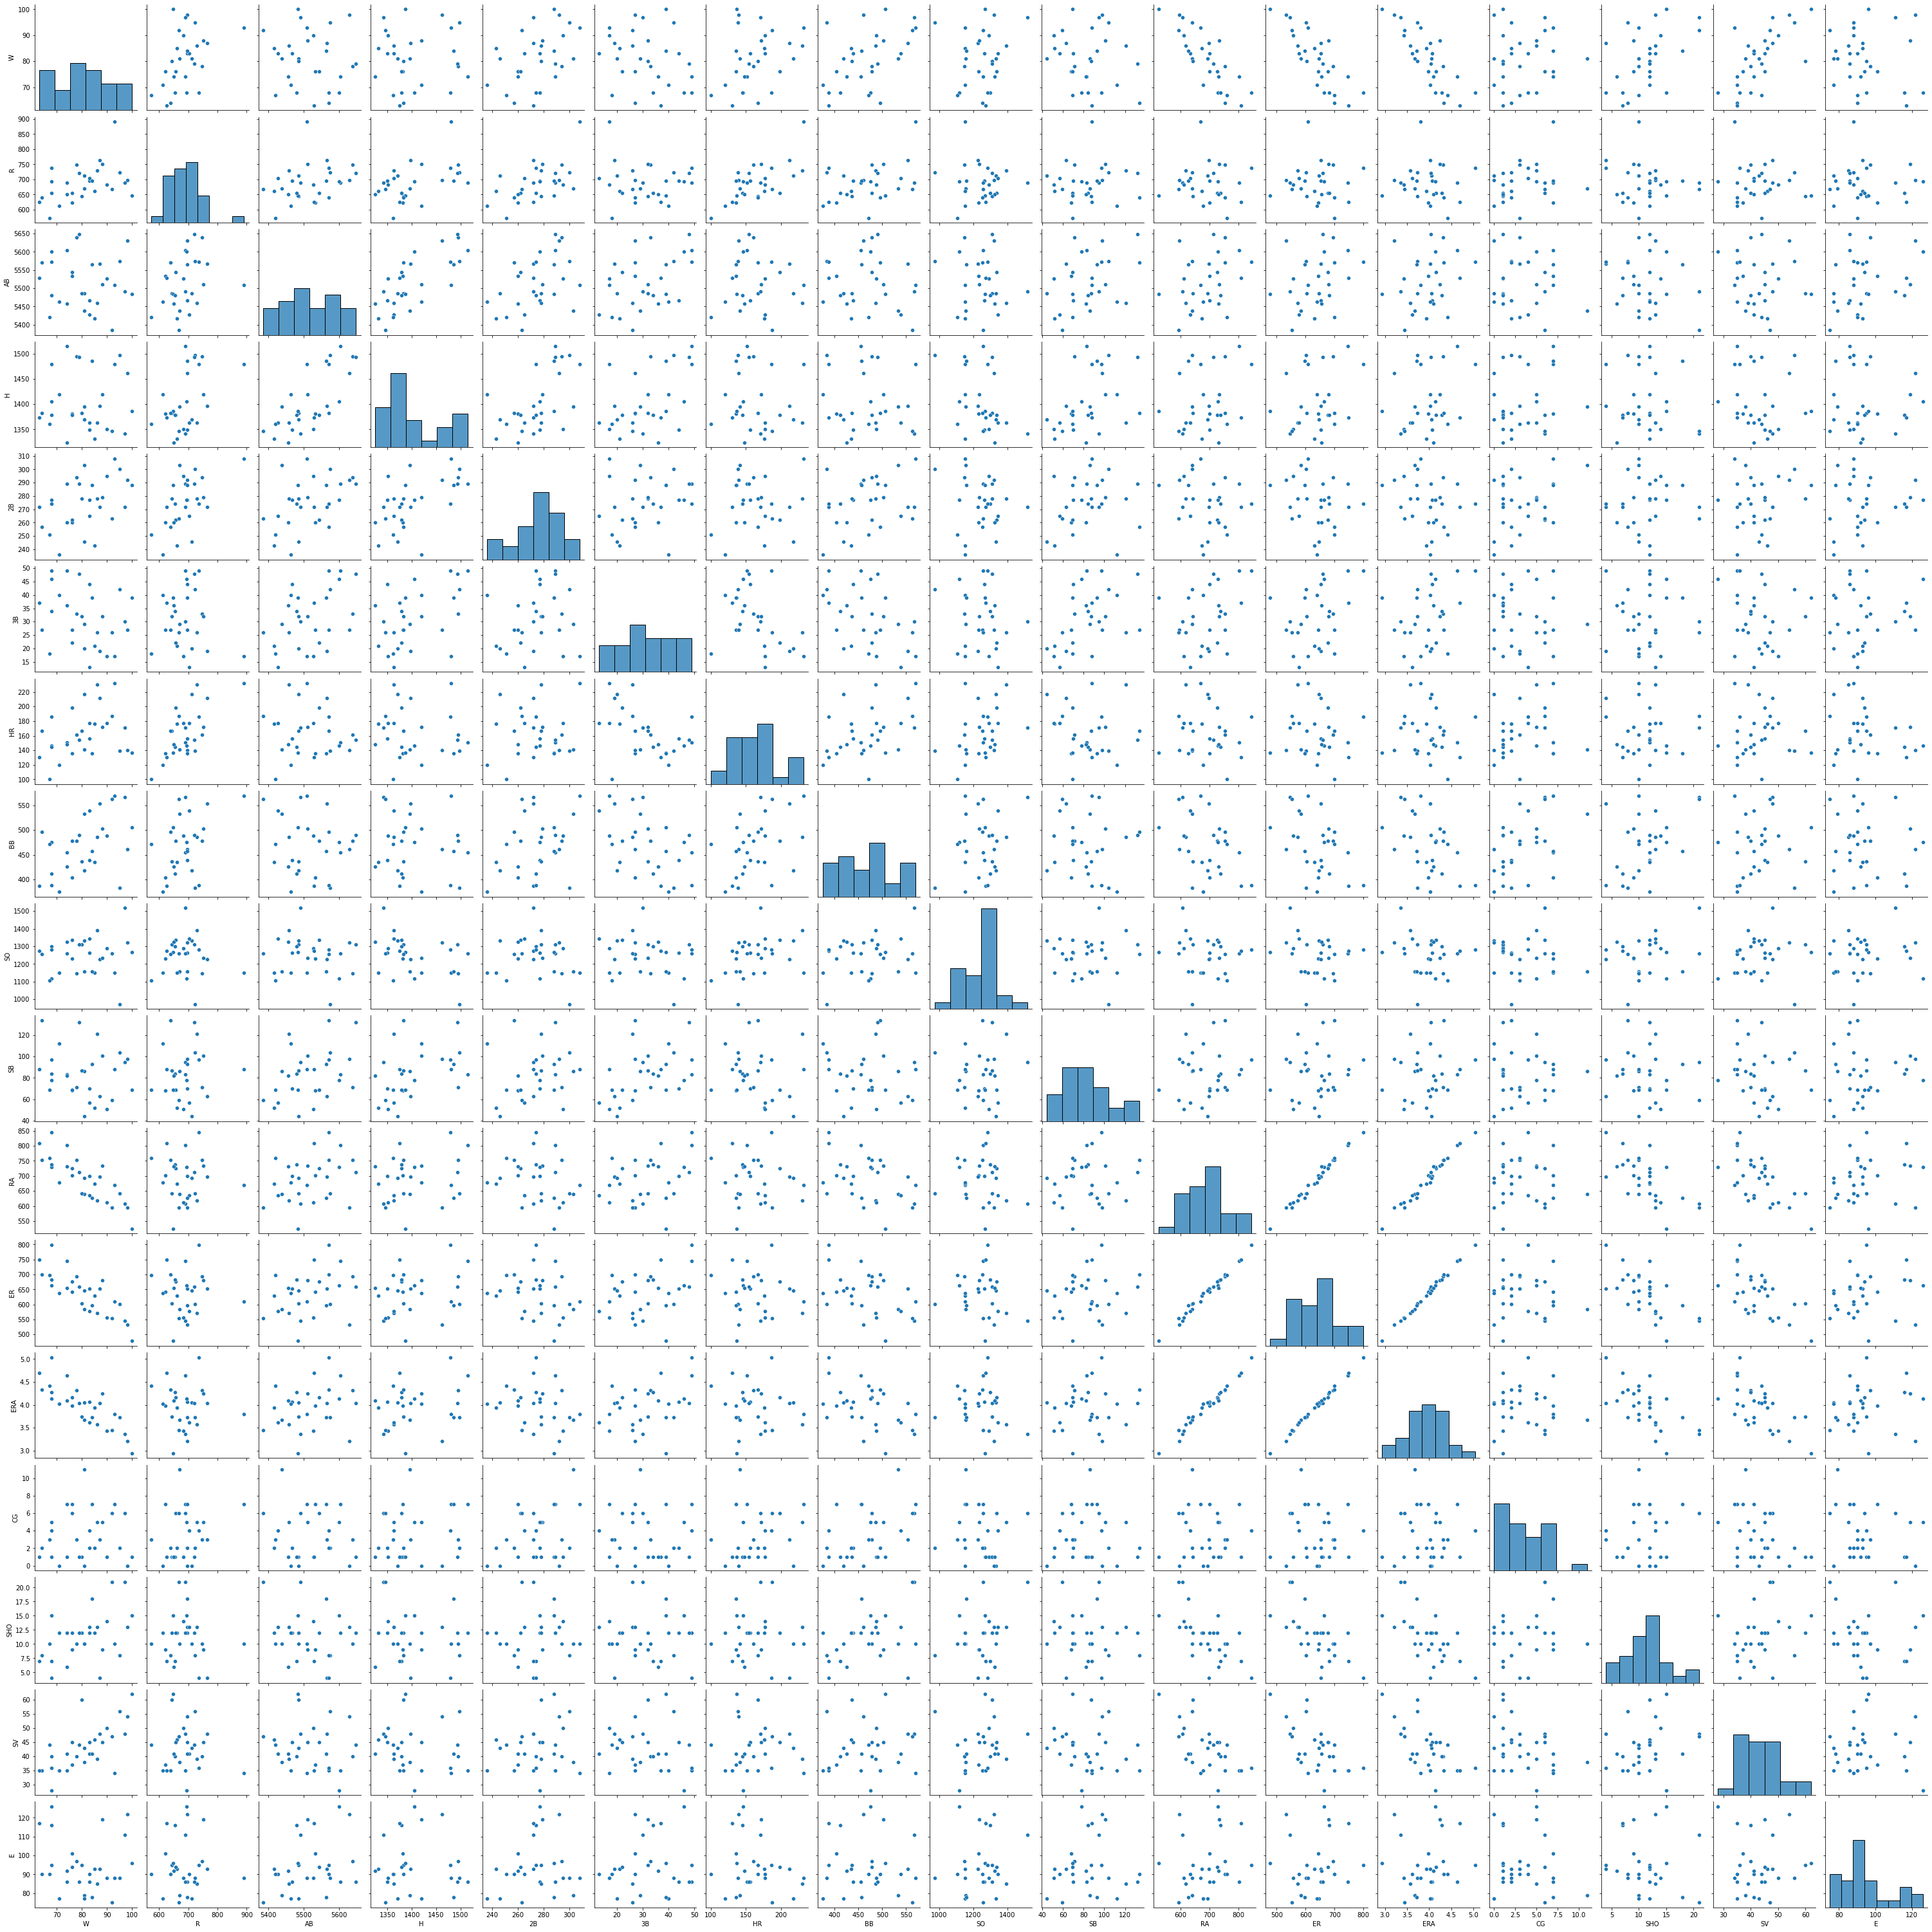

In [23]:
sns.pairplot(df)
plt.show()

##### They are making a good corelation or they are just scattered without any pattern 

## Heatmap:

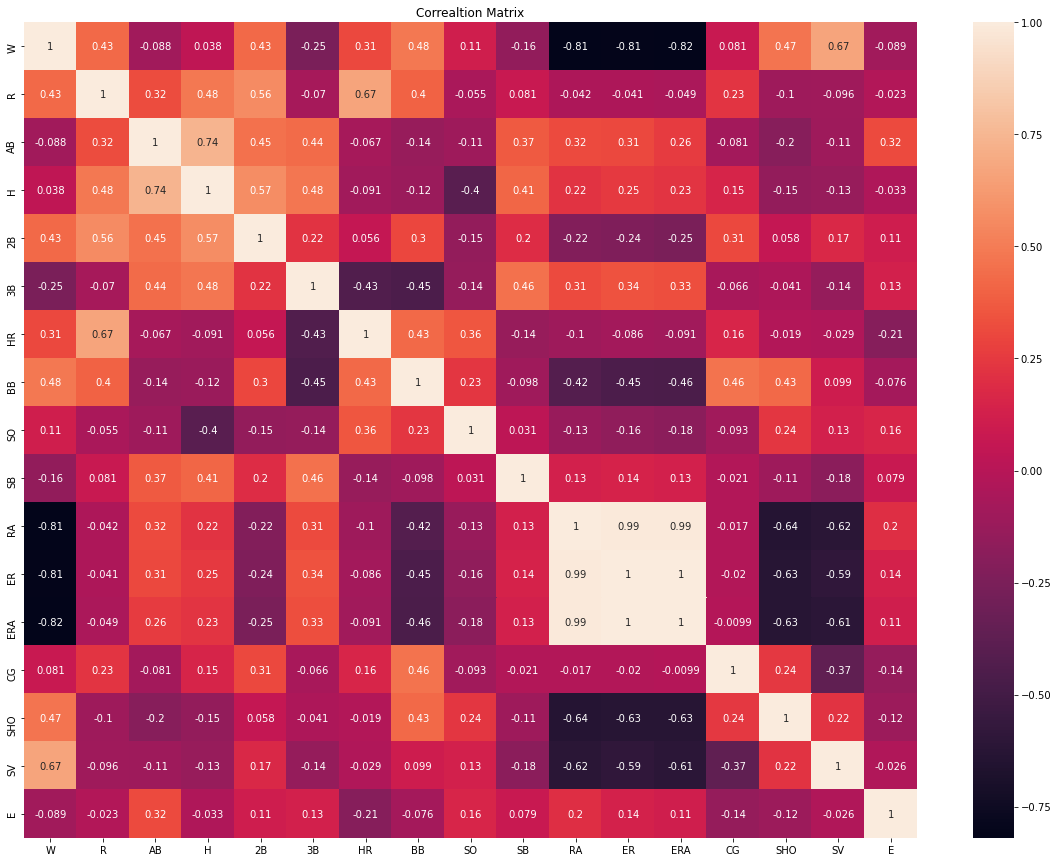

In [24]:
plt.figure(figsize = [20,15])
sns.heatmap(df.corr(), annot = True)
plt.title('Correaltion Matrix')
plt.show()

#####  it is lightly correlated with each other but RA,ER,ERA columns are highly correlated with each other. Also These columns are highly negatively correlated with Wins(W) columns that means there is high impact of these columns on wining. We are dropping two columns(er,ra) and keeping ERA from them because these have same kind of effect on wins, will not affect the prediction model.

## Data Cleaning

In [25]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

### There is no null values

### Checking for Outliers


<AxesSubplot:>

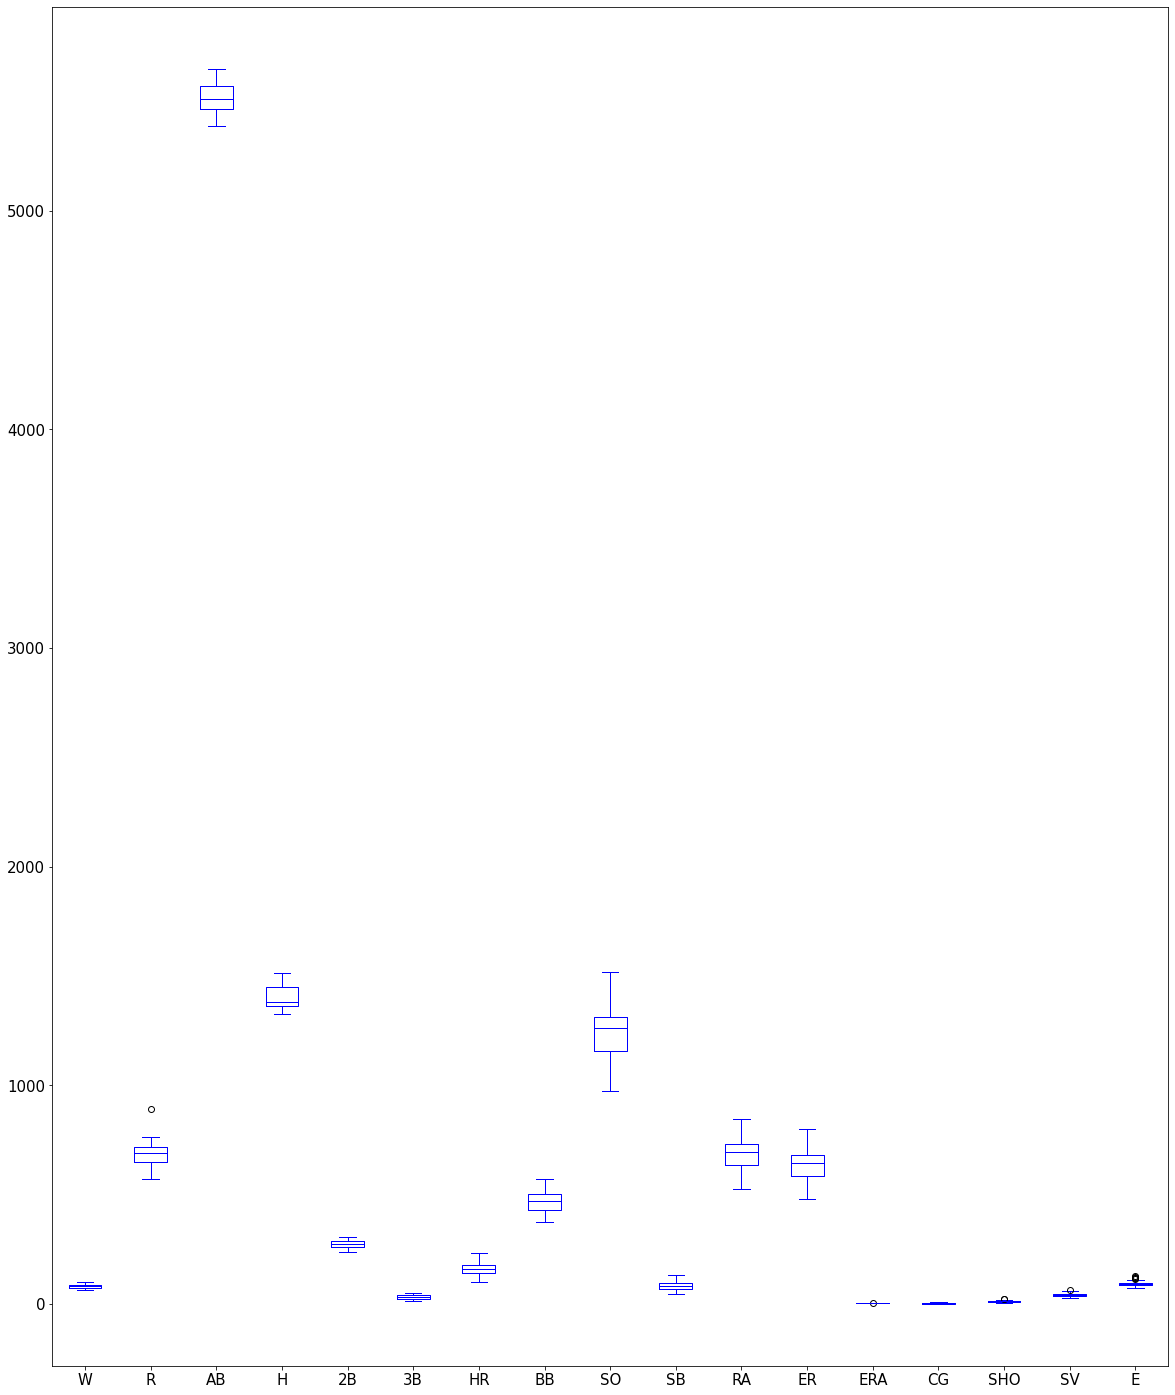

In [26]:
df.plot(kind='box',fontsize=15,figsize=(20,25),color='b')


##### Observing the box plot say that there are outliers are R-Runs,ERA-Earned Run average,SHO-Shutout,SV-Saves,E-Errors.

### Removing outliers

In [27]:
features=df[['R','ERA','SHO','SV','E']]

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


###### I have removed outliers by using Zscore.

In [29]:
df_new.shape

(29, 17)

### After removing filters there are 29 rows and 17 columns

In [30]:
df.shape

(30, 17)

###### 30 rows and 17 columns in old data

## Checking for Skweness

In [31]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

 ###### That there is skewness in Hits(H),Completed games(CG),Shoutouts(SHO),Saves(SV),Errors(E).

## Removing Skewness:

In [32]:
skew_features=["H","CG","SHO","SV","E"]

In [33]:
# removing skewness in H by using log1p
df_new["H"]=np.log1p(df_new["H"])

In [34]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
paramaters:
method = 'box_cox' or 'yeo-jhonson'
'''

"\nparamaters:\nmethod = 'box_cox' or 'yeo-jhonson'\n"

In [35]:
df_new[['E','SHO','SV','CG']] = scaler.fit_transform(df_new[['E','SHO','SV','CG']].values)

In [36]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

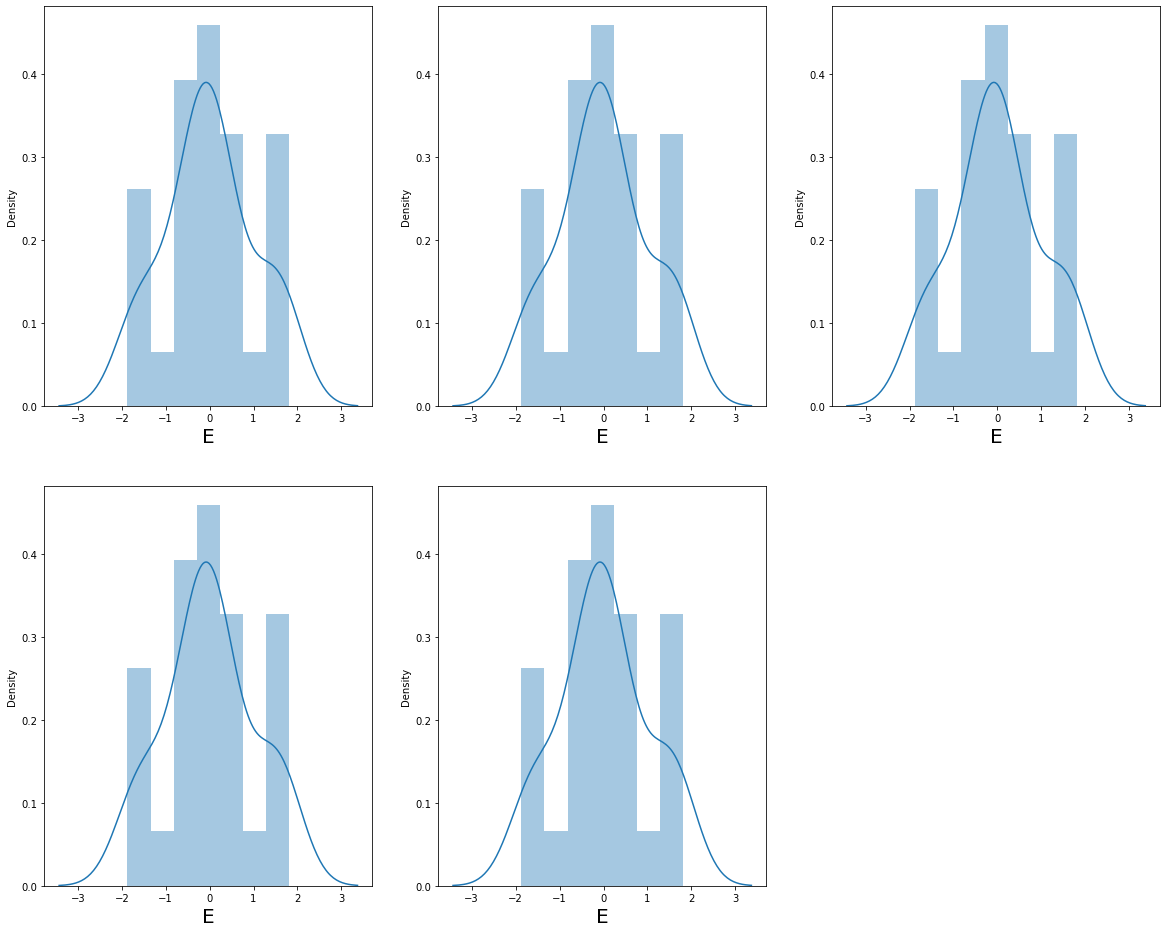

In [37]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for columns in df_new[skew_features]:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

#### skewness is removed.

## Spliting the columns

In [38]:
x = df_new.drop("W", axis=1)
y = df_new["W"]

## Scaling using StandardScaler:

In [39]:
### Importing liabraires
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [47]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [48]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,7.112342,R
1,20.237195,AB
2,10.114607,H
3,3.528059,2B
4,3.227808,3B
5,8.736960,HR
6,3.324550,BB
7,2.811546,SO
8,1.955254,SB
9,200.826177,RA


VIF values i can say that multicolinearity exists in RA,ER,ERA. So let me drop RA and ER columns to avoid multicolinearity.

In [51]:
X = X.drop(["ER"],axis=1)

In [52]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.496876,1.264463,0.236737,-1.149165,-0.540820


I can see Dependent variables after removing multicolinearity.

In [53]:
vif=pd.DataFrame()
vif["vif_features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_features,Features
0,6.069116,R
1,7.791456,AB
2,9.340727,H
3,3.227862,2B
4,3.125190,3B
5,7.474108,HR
6,3.323583,BB
7,2.786186,SO
8,1.787493,SB
9,142.535647,RA


Still vif is high for 2 columns so let me drop ERA

In [54]:
X = X.drop(["ERA"],axis=1)

In [55]:
vif=pd.DataFrame()
vif["vif_features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_features,Features
0,6.019438,R
1,5.210230,AB
2,7.728111,H
3,3.165732,2B
4,2.981242,3B
5,6.168639,HR
6,3.053363,BB
7,2.287734,SO
8,1.773119,SB
9,4.759240,RA


Multicolinearity issue is solved

Splitting the data for Training and Testing

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Find the Random State

In [60]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')
    

At random state0, The training accuracy is :-0.9768383015216393
At random state0, The test accuracy is :-0.49963681285927775


At random state1, The training accuracy is :-0.9762285427209911
At random state1, The test accuracy is :-0.18565756675520972


At random state2, The training accuracy is :-0.9638255316870868
At random state2, The test accuracy is :--0.2679901647388272


At random state3, The training accuracy is :-0.9677990948927815
At random state3, The test accuracy is :-0.6776697786661834


At random state4, The training accuracy is :-0.9680569379679669
At random state4, The test accuracy is :-0.7641316816583286


At random state5, The training accuracy is :-0.9612472010423034
At random state5, The test accuracy is :-0.6051495407609396


At random state6, The training accuracy is :-0.9723763056746941
At random state6, The test accuracy is :-0.7504731543294726


At random state7, The training accuracy is :-0.9610245315460946
At random state7, The test accuracy is :-0.31669541

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [63]:
x_train.shape

(22, 16)

In [64]:
y_train.shape

(22,)

In [65]:
x_test.shape

(7, 16)

In [66]:
y_test.shape

(7,)

## Regression Algorithms

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

### 1.) Linear Regression:

In [70]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)


0.9633011594527375


In [72]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 27.077878720331576
MAE: 4.999072397573668
r2_score: 0.870272379874153


### 2)SGD:

In [76]:
from sklearn.linear_model import SGDRegressor

sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))


R2_score: -3.16645899916892e+29
MSE: 4.296044780913262e+31
MAE: 6542422129970163.0
RMSE: 6554422004199350.0


SGD is giving me 90% r2_score

### 3) Lasso Regressor

In [77]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 10, 'random_state': 0}


In [78]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))


R2_score: 0.8162585359689928
MSE: 24.928841895472164
MAE: 4.824282278813735
RMSE: 4.992879118852384


### 4) Ridge Regressor

In [79]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 1, 'solver': 'saga'}


In [80]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))


R2_score: 0.8412293076862607
MSE: 21.540970663300794
MAE: 4.3822306255797026
RMSE: 4.64122512525527


### 5) Cross validation

In [81]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 33.227142, 22.206678
R   : 32.549049, 32.609656
svr   : 54.292689, 31.284378
svr_p   : 111.891643, 79.768934
svr_r   : 112.275451, 79.777668
RF   : 39.864027, 24.023091
DTR   : 70.216667, 45.490539
GBR   : 47.569624, 31.099844


### 6) Hyper Parameter Tuning:

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
parameter = {'alpha':[0.01,0.1,1.0,10.26],
            'selection':['cyclic','random'],
            'max_iter':[2,4,6,8,10],
            'tol':[100,1000],
            'fit_intercept':['bool']}

In [84]:
GVC=GridSearchCV(Lasso(),parameter,cv=5)

In [85]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [86]:
GVC.best_params_

{'alpha': 0.1,
 'fit_intercept': 'bool',
 'max_iter': 2,
 'selection': 'random',
 'tol': 1000}

In [87]:
Final_mod=Lasso(alpha=1.0, fit_intercept="bool", max_iter=4, selection="random", tol=1000)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_Score: 79.48387716584051
mean_squared_error: 27.83493563295762
mean_absolute_error: 4.3354552220416105
RMSE value: 5.275882450638719


### Saving the model:

In [89]:
import joblib
joblib.dump(Final_mod,"BaseBallCaseStudy")

['BaseBallCaseStudy']

I have saved my model using joblib.

In [90]:
model=joblib.load("BaseballCaseStudy")

prediction = model.predict(x_test)
prediction

array([69.58640733, 67.11525668, 85.45311838, 79.89227939, 85.81429738,
       88.93161129, 83.67532456])

In [91]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6
Predicted,69.586407,67.115257,85.453118,79.892279,85.814297,88.931611,83.675325
Original,67.000000,63.000000,97.000000,76.000000,83.000000,92.000000,86.000000


Both original and predicted values are almost equal.

### COMPLETED THE BASEBALLCASE STUDY